<a href="https://colab.research.google.com/github/Hari0077/FYP_TNTD/blob/main/tntd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd



`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data_dir = "/content/drive/MyDrive/thyroid_images/train"
validation_data_dir = "/content/drive/MyDrive/thyroid_images/validation"

In [5]:
from tensorflow.keras.preprocessing import image

In [6]:
img  = image.load_img("/content/drive/MyDrive/thyroid_images/train/Benign/124_1.jpg")

In [7]:
import cv2

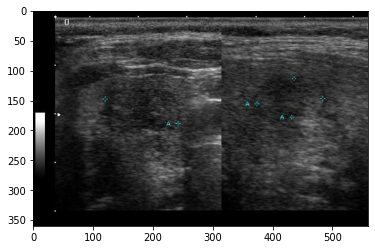

In [8]:
plt.imshow(img)

In [9]:
cv2.imread("/content/drive/MyDrive/thyroid_images/train/Benign/124_1.jpg")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
img_width=200
img_height=200
batch_size=3

In [11]:
datagen=ImageDataGenerator(rescale=1.0/255)

In [12]:
train_data_gen=datagen.flow_from_directory(train_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['Benign','Malign'],
                                           class_mode='binary'
                                           )
validation_data_gen=datagen.flow_from_directory(validation_data_dir,
                                           target_size=(img_width,img_height),
                                           classes=['Benign','Malign'],
                                           class_mode='binary')


Found 273 images belonging to 2 classes.
Found 139 images belonging to 2 classes.


In [13]:
train_data_gen.class_indices

{'Benign': 0, 'Malign': 1}

In [14]:
train_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
validation_data_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(200,200,3)),
      tf.keras.layers.MaxPool2D(2,2),
      #
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      #
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
     ##
      tf.keras.layers.Flatten(),
     ##
     tf.keras.layers.Dense(512,activation='relu'),
      ##
     tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [17]:
from tensorflow.keras.optimizers import RMSprop

In [18]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [25]:
model_fit = model.fit(train_data_gen,
                      steps_per_epoch=7,
                      epochs = 5,
                      validation_data = validation_data_gen)

Epoch 1/5
7/7 [==============================] - 11s 2s/step - loss: 0.2195 - accuracy: 0.9043 - val_loss: 1.8765 - val_accuracy: 0.7554
Epoch 2/5
7/7 [==============================] - 10s 1s/step - loss: 0.4022 - accuracy: 0.8973 - val_loss: 0.5648 - val_accuracy: 0.7266
Epoch 3/5
7/7 [==============================] - 10s 2s/step - loss: 0.2542 - accuracy: 0.8708 - val_loss: 0.4050 - val_accuracy: 0.7842
Epoch 4/5
7/7 [==============================] - 10s 1s/step - loss: 0.2287 - accuracy: 0.9139 - val_loss: 0.4216 - val_accuracy: 0.7986
Epoch 5/5
7/7 [==============================] - 10s 1s/step - loss: 0.1902 - accuracy: 0.9330 - val_loss: 0.4321 - val_accuracy: 0.7914


In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [27]:
import tensorflow as tf
from keras.models import load_model
model.save('model.h5')

In [28]:
import os

In [ ]:
pip install gTTs

In [ ]:
pip install translate

8_1 (copy).jpg


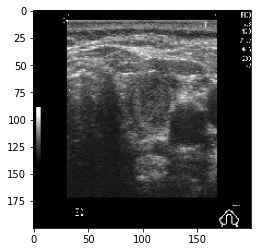

Malign
30_1 (copy).jpg


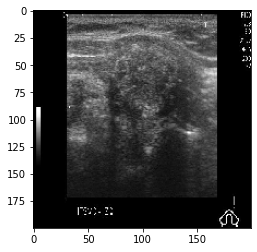

Malign
2_1.jpg


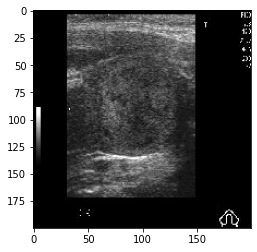

Benign
51_1.jpg


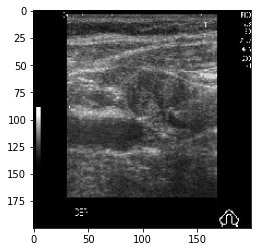

Malign
61_1.jpg


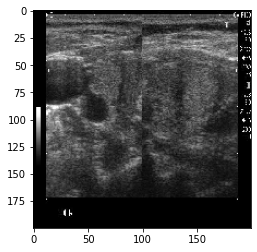

Malign
66_1.jpg


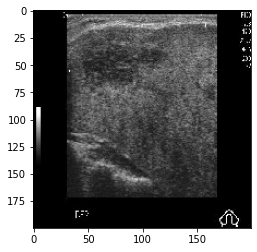

Malign
127_1.jpg


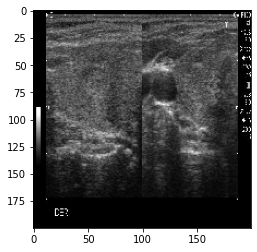

Malign
130_1.jpg


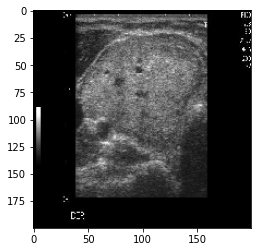

Benign
309_1.jpg


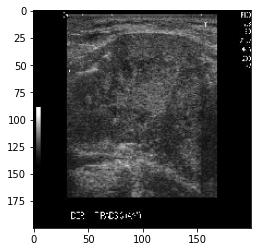

Benign
334_1.jpg


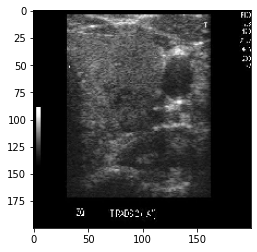

Benign
346_1.jpg


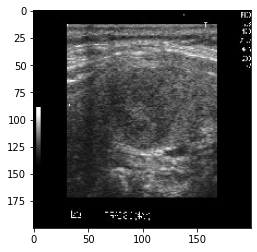

Benign
347_1.jpg


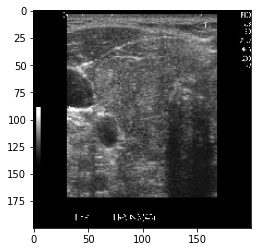

Benign
347_2.jpg


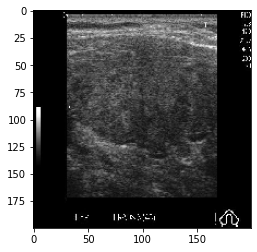

Benign
3_1.jpg


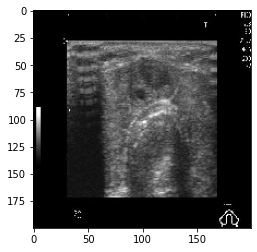

Malign
4_1.jpg


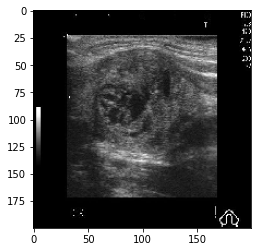

Malign
6_1 (copy).jpg


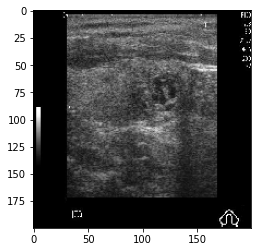

Malign
9_1 (copy).jpg


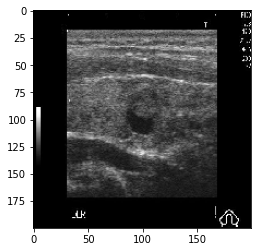

Malign
5_1 (copy).jpg


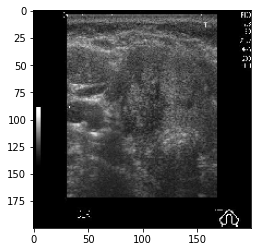

Malign
11_1 (copy).jpg


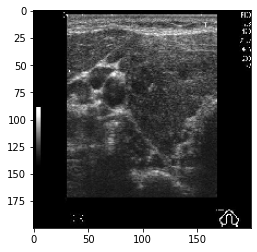

Malign
19_1 (copy).jpg


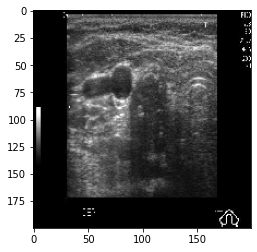

Malign


In [30]:
from keras.preprocessing.image import load_img
from keras.models import load_model
#from IPython.display import Audio
#from PIL import ImageDraw, ImageFont, Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# from googletrans import Translator
#from translate import Translator

model = load_model("/content/model.h5")


dir_path = '/content/drive/MyDrive/thyroid_images/test'

for i in os.listdir(dir_path):
    print(i)
    img = image.load_img(dir_path+'/'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
      print("Benign")
    else:
      print("Malign")